In [1]:
#imports
import pandas as pd
import numpy as np
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#imports sets
us_income_train = "datasets/cleaned/data_train.csv"
us_income_test = "datasets/cleaned/data_test.csv"
df = pd.read_csv(us_income_train)
df_test = pd.read_csv(us_income_test)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [4]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [5]:
#splitting
X = df.drop("income",axis=1)
y = df.income.values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2, test_size=0.3)

In [7]:
rfc = RandomForestClassifier()

In [8]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
baseline_accuracy =rfc.score(X_test,y_test)

In [10]:
baseline_accuracy

0.8512642030914116

------------------------------------

## With accuracy as scoring

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [13]:
params = {
    "n_estimators" : [10,20,30,40,50,100],
    "criterion" : ["gini","entropy"],
    "max_depth" : [0,2,5,10],
    "min_samples_leaf" : [1,10,20]
    #'max_features' : np.arange(0.1,1,0.1).tolist()
}

In [17]:
rfc_2 = RandomForestClassifier(random_state=42)

In [18]:
rfc_roc = RandomForestClassifier( random_state=42)

In [19]:
# Setting up the grid search that will test every combination of parameters
gridsearch = GridSearchCV(estimator = rfc_2,
                        param_grid = params,
                        scoring = "accuracy",
                        cv = 5, # Use 5 folds
                        verbose = 4,
                        n_jobs = -1
                        #Use all but one CPU core
                        )
# Setting up the grid search that will test every combination of parameters
gridsearch_roc = GridSearchCV(estimator = rfc_roc,
                        param_grid = params,
                        scoring = "roc_auc",
                        cv = 5, # Use 5 folds
                        verbose = 4,
                        n_jobs = -1
                       #Use all but one CPU core
                        )


In [20]:
result_roc = gridsearch_roc.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.5min finished


In [21]:
#Checking our gridsearch

result = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.3min finished


In [22]:
#Getting best estimator
roc_best = result_roc.best_estimator_
accuracy_best = result.best_estimator_

In [23]:
result_roc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [24]:
result_roc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [25]:
result_roc.best_score_ #Why?

0.9176072633548648

In [26]:
pred = roc_best.predict(X_test)

In [27]:
pred = roc_best.predict(X_train)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(y_train,pred)

0.7663944842985415

In [32]:
accuracy_score(y_train,pred)

0.8688136188136188

In [33]:
result.best_score_

0.8613111733528163

In [34]:
score_with_roc_best = roc_best.score(X_train, y_train)
print("The generalization accuracy of the model is {:.2f}% on train set".format(score_with_roc_best * 100))

The generalization accuracy of the model is 86.88% on train set


In [35]:
score_with_roc_best = roc_best.score(X_test, y_test)
print("ROC = The generalization accuracy of the model is {:.2f}%".format(score_with_roc_best * 100))

ROC = The generalization accuracy of the model is 85.11%


In [36]:
score_with_accuracy_best = accuracy_best.score(X_test, y_test)
print("Accuray =The generalization accuracy of the model is {:.2f}%".format(score_with_accuracy_best * 100))

Accuray =The generalization accuracy of the model is 85.30%


-------------------------------------

# Validation

In [37]:
#define y_pred
y_pred_accuracy = accuracy_best.predict(X_test)
y_pred_roc = roc_best.predict(X_test)

## Crosstab

In [38]:
pd.crosstab(y_test, y_pred_accuracy, 
            rownames=["Actual"], 
            colnames=["Prediction"], margins=True)

Prediction,0,1,All
Actual,,,
0,7035,325,7360
1,1111,1298,2409
All,8146,1623,9769


In [39]:
pd.crosstab(y_test, y_pred_roc, 
            rownames=["Actual"], 
            colnames=["Prediction"], margins=True)

Prediction,0,1,All
Actual,,,
0,7038,322,7360
1,1133,1276,2409
All,8171,1598,9769


## Classification Report

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_pred_accuracy))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7360
           1       0.80      0.54      0.64      2409

    accuracy                           0.85      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.85      0.84      9769



In [42]:
print(classification_report(y_test, y_pred_roc))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7360
           1       0.80      0.53      0.64      2409

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



## Roc CURVE Evaluation

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [70]:
roc_proba = roc_best.predict_proba(X_test)
accuracy_proba = accuracy_best.predict_proba(X_test)

In [ ]:
#find best index x

In [62]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, roc_proba[:,0])

In [63]:
#

In [64]:
fpr

array([0.00000000e+00, 1.35869565e-04, 2.71739130e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [65]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99833956, 0.99916978,
       1.        ])

In [66]:
thresholds

array([1.99997783, 0.99997783, 0.99997176, ..., 0.01460168, 0.01399895,
       0.01084797])

In [67]:
def roc_curve_test(y_test, y_pred_1,y_pred_2):
    # calculate roc curve and plot the different curves
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_2)

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # calculate no skill roc curve 
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    # plot the roc curve for the model   
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr_1, tpr_1, marker='v', label='RandomForestClassifier_accuracy')
    plt.plot(fpr_2, tpr_2, marker='.', label='RandomForestClassifier_roc')

    # axis labels
    plt.xlabel('FALSE POSITIVE RATE')    
    plt.ylabel('TRUE POSITIVE RATE')    
    # show the legend                          
    plt.legend()                                    
    # show the plot                                 
    plt.show()
    return True                      #to get a return by convention

def score_roc_auc (y_test, y_pred_1, y_pred_2):
    # calculate scores
    ns_auc_1 = roc_auc_score(y_test, y_pred_1)
    ns_auc_2 = roc_auc_score(y_test, y_pred_2)
   
    return [ns_auc_1, ns_auc_2]      #to get a list instead of a tuple

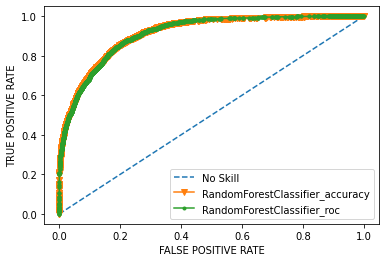

True

In [72]:
roc_curve_test(y_test=y_test,y_pred_1=accuracy_proba[:,1],y_pred_2=roc_proba[:,1])

In [74]:
score_roc_auc (y_test, y_pred_roc, y_pred_accuracy)

[0.7429651826484018, 0.7473275883462379]

### Matthews Correlation Coefficient 

In [79]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix  

In [80]:
def mat_cor (y_test, y_pred_1, y_pred_2):
    mat_cor_1 = matthews_corrcoef(y_test, y_pred_1)
    mat_cor_2 = matthews_corrcoef(y_test, y_pred_2)
    return [mat_cor_1, mat_cor_2]
def conf_matrix (y_test, y_pred_1, y_pred_2):
    conf_1 = confusion_matrix(y_test, y_pred_1)
    conf_2 = confusion_matrix(y_test, y_pred_2)
    return conf_1, conf_2

In [81]:
mat_cor (y_test, y_pred_accuracy, y_pred_roc)

[0.5728334930189323, 0.5662462683504148]

In [82]:
conf_1,conf_2 = conf_matrix (y_test, y_pred_accuracy, y_pred_roc)

In [83]:
conf_2

array([[7038,  322],
       [1133, 1276]], dtype=int64)

In [84]:
import seaborn as sns
def heatmap_conf (conf_1, title): 
    ax = plt.axes()
    sns.heatmap(conf_1, ax = ax,center=True)
    ax.set_title(title)
    plt.savefig("{}_heatmap.jpg")
    return True

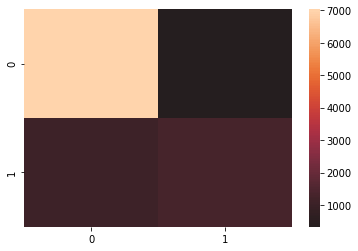

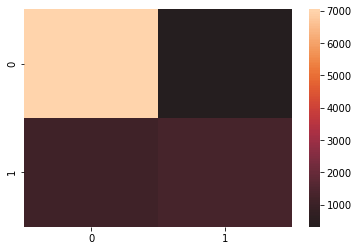

True

In [85]:
heatmap_conf(conf_1,conf_2)